#K-Fold

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [72]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSOK2qkZ0WCM_MFIIdQSKmekXnH1uaOsVsy-TFlw6_a-EwitfiHx_LG14Ma-cl1Yxg83Wjn8GtSJEvt/pub?gid=1391324763&single=true&output=csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.93,-60.46,1137.04,-3.49,NaN,-5.88,-17.13,7.44
1,-68.18,-127.21,23.30,1471.49,16.95,2.30,-11.51,-7.70,7.31
2,-95.05,36.10,-75.27,1158.04,6.97,3.21,-5.86,8.65,-5.77
3,124.40,-8.19,NaN,5527.92,7.36,7.23,10.77,1.92,-0.42
4,-103.25,NaN,-2.89,4865.06,-5.21,-1.54,NaN,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.65,-44.41,9775.28,-3.43,4.95,4.60,-11.73,11.78
186,1.62,145.02,53.26,4546.80,11.81,-4.31,4.86,-0.42,3.79
187,29.46,33.91,-20.96,6083819.57,5.10,2.93,1.23,3.23,-3.17
188,-64.93,25.39,-118.74,1746.40,226.26,-1.91,-16.11,-10.44,0.97


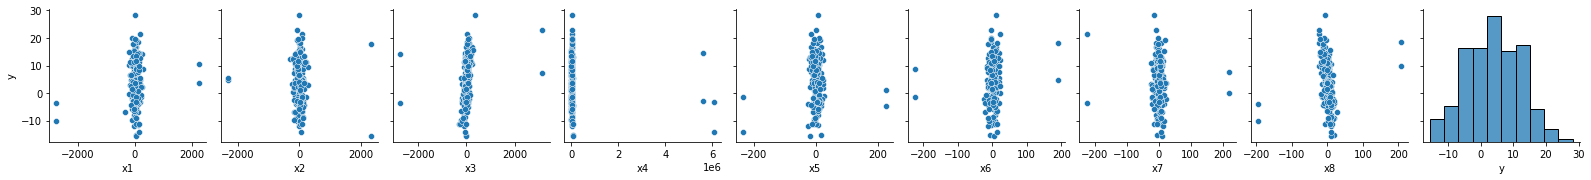

In [73]:
sns.pairplot(df,y_vars=["y"])

In [74]:
df.corr().sort_values("y")[["y"]]

,y
x4,-0.104106
x7,-0.059076
x2,-0.052188
x8,0.001314
x5,0.041706
x6,0.080066
x1,0.133169
x3,0.205964
y,1.000000


In [75]:
for i in [3,8]:
  print(i)
  text = 'x' + str(i)
  low, high = df[text].quantile([0.05, 0.95])
  df.dropna(subset=[text],inplace=True)
  df.drop(df[df[text]<low].index,inplace=True)
  df.drop(df[df[text]>high].index,inplace=True)
df.dropna(subset=['y'],inplace=True)

3
8


In [76]:
df.corr().sort_values("y")[["y"]]

,y
x8,-0.544597
x4,-0.139519
x2,-0.086618
x6,0.026147
x7,0.028637
x5,0.073868
x1,0.136726
x3,0.469978
y,1.000000


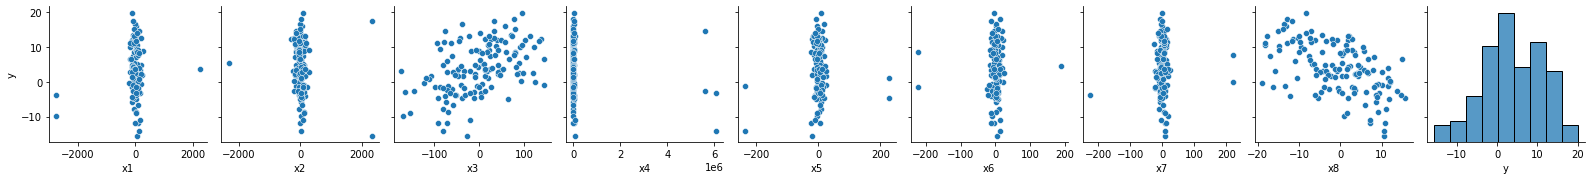

In [77]:
sns.pairplot(df,y_vars=["y"])

In [78]:
df.reset_index(inplace=True)

In [79]:
X = df[["x3","x8"]]
y = df["y"]

In [80]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   137 non-null    int64  
 1   x1      132 non-null    float64
 2   x2      131 non-null    float64
 3   x3      137 non-null    float64
 4   x4      133 non-null    float64
 5   x5      130 non-null    float64
 6   x6      128 non-null    float64
 7   x7      130 non-null    float64
 8   x8      137 non-null    float64
 9   y       137 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 10.8 KB


In [82]:
k = 5
kf = KFold(n_splits=k)

In [83]:
round_num = 1
RMSEs = []

for train_index, test_index in kf.split(X_scaled):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]
  lm = LinearRegression()
  lm.fit(X_train,y_train)
  y_pred = lm.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  RMSEs.append(rmse)
  round_num+=1
kfold_rmse = np.array(RMSEs).mean()
print("K-Fold CV", "RMSE = ", kfold_rmse)

K-Fold CV RMSE =  4.581391892959059


In [84]:
lm.fit(X,y)
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(X.columns)):
  print("", lm.coef_[i],"*",X.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 0.05754240290097984 * x3    +
 -0.5401461776685842 * x8    +
 3.557539906763353


#Predict

In [85]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTg-Ej9S3Y86_Sd4dE-H75vC5KbxlB9v4mBTquDfzTtPEOPupaN3Q_9Dj6eYByTL-sxSIIvDpSzvjXg/pub?gid=587747439&single=true&output=csv')

In [86]:
df['x3'].fillna(value = df['x3'].mean(), inplace=True)
df['x8'].fillna(value = df['x8'].mean(), inplace=True)
X_Test = df[['x3','x8']]
y_pred = lm.predict(X_Test)

In [87]:
for x in range(10):
  df.loc[[x],['y_pred']] = y_pred[x]

In [88]:
df[['y','y_pred']]

,y,y_pred
0,A_01,1.485717
1,A_02,3.076628
2,A_03,1.360004
3,A_04,-2.391307
4,A_05,6.962428
5,A_06,-2.324233
6,A_07,13.508843
7,A_08,-14.398972
8,A_09,2.768259
9,A_10,8.026924
